In [1]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib #   !pip install dlib
from imutils import face_utils

In [2]:
# Kết nối đến Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/test_opencv'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['face.jpg', 'face2.jpg', 'models']

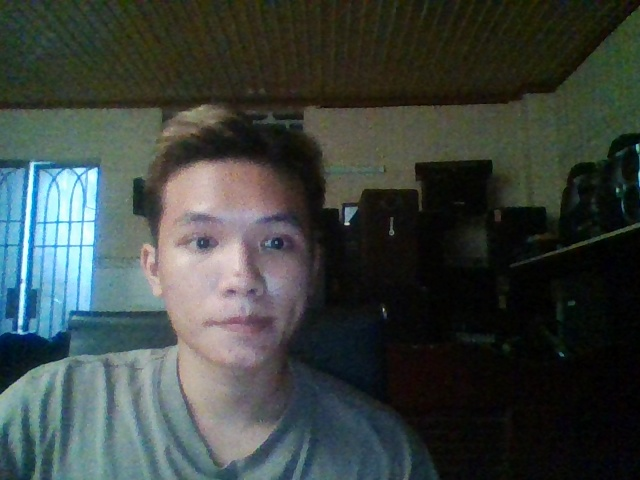

In [4]:
img = cv2.imread(path + "/face2.jpg")
cv2_imshow(img)

/content/drive/MyDrive/test_opencv/models/shape_predictor_68_face_landmarks.dat
/content/drive/MyDrive/test_opencv/models/dlib_face_recognition_resnet_model_v1.dat
-0.191518
0.147217
0.073957
-0.0348278
-0.0355082
-0.0417437
-0.028099
-0.0891369
0.13002
-0.0308105
0.325488
-0.00625124
-0.249517
-0.165324
-0.0319812
0.212584
-0.178015
-0.123306
-0.0325981
0.0522529
0.0900288
-0.00164783
0.0928432
0.0292294
-0.0725316
-0.389491
-0.0576727
-0.100816
0.0246705
-0.0539695
-0.0397927
-0.0141268
-0.189937
-0.0652287
0.00508307
0.0926355
-0.0636561
-0.032196
0.210166
-0.0301343
-0.264176
-0.0126889
0.0601788
0.274074
0.238806
0.0692554
0.0331182
-0.116372
0.121354
-0.200482
0.0585413
0.0867761
0.117803
0.0227937
-0.0019526
-0.136592
0.0111956
0.137562
-0.206724
0.0128454
0.0282875
-0.127142
-0.0271044
-0.0215552
0.224647
0.0800958
-0.143135
-0.142093
0.136881
-0.124281
-0.0234759
0.128733
-0.151374
-0.2003
-0.348935
0.0110703
0.398727
0.0192677
-0.13491
0.0195846
-0.00938075
-0.0137193
0.08769

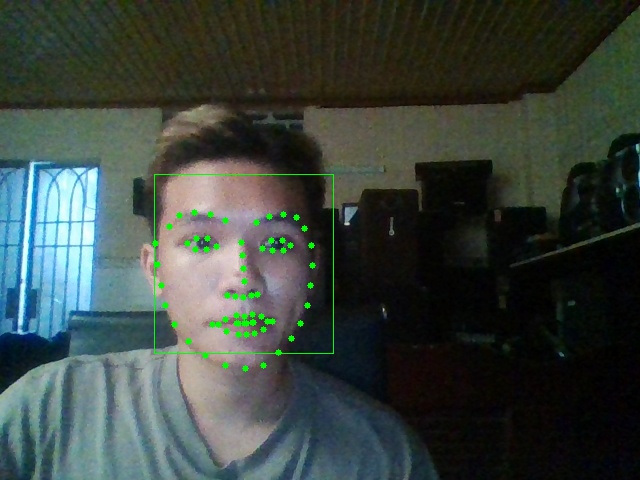

In [7]:
face_landmarks_model_path = path+ "/models/shape_predictor_68_face_landmarks.dat"
print(face_landmarks_model_path)
face_recognition_model_path = path+ "/models/dlib_face_recognition_resnet_model_v1.dat"
print(face_recognition_model_path)
img_path = path+  "/face2.jpg"

# Tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()

# ĐỌc hình ảnh và phát hiện khuôn mặt
img = cv2.imread(img_path)

# Nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)

# Vòng lặp qua từng khuôm mặt
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

    # Phát hiện ra các điểm đặc trưng trên khuôn mặt
    shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
    face_shape = shape_predictor(img, face)
    face_shape_array = face_utils.shape_to_np(face_shape)

     # Tính toán đặc trưng của khuôn mặt
    shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)
    face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
    print(face_descriptors)

     # Vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
    cv2.rectangle(img, point_a, point_b, (0,255,0))
    for point in face_shape_array:
        cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

cv2_imshow(img)